**Multi-Class Prediction of Obesity Risk**

Avdeev Roman

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Data

In [ ]:
df_train.shape

(20758, 18)

In [ ]:
df_test.shape

(13840, 17)

In [ ]:
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


Оценим признаки. Рассмотрим их типы для формирования подмножеств категориальных/численных фичей

а также проверим наличие пропусков

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

Статистики данных:

In [ ]:
df_train.describe(include='all')

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,20758.00000,20758,20758.000000,20758.000000,20758.000000,20758,20758,20758.000000,20758.000000,20758,20758,20758.000000,20758,20758.000000,20758.000000,20758,20758,20758
unique,NaN,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,3,5,7
top,NaN,Female,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_III
freq,NaN,10422,NaN,NaN,NaN,17014,18982,NaN,NaN,17529,20513,NaN,20071,NaN,NaN,15066,16687,4046
mean,10378.50000,NaN,23.841804,1.700245,87.887768,NaN,NaN,2.445908,2.761332,NaN,NaN,2.029418,NaN,0.981747,0.616756,NaN,NaN,NaN
std,5992.46278,NaN,5.688072,0.087312,26.379443,NaN,NaN,0.533218,0.705375,NaN,NaN,0.608467,NaN,0.838302,0.602113,NaN,NaN,NaN
min,0.00000,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,5189.25000,NaN,20.000000,1.631856,66.000000,NaN,NaN,2.000000,3.000000,NaN,NaN,1.792022,NaN,0.008013,0.000000,NaN,NaN,NaN
50%,10378.50000,NaN,22.815416,1.700000,84.064875,NaN,NaN,2.393837,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.573887,NaN,NaN,NaN
75%,15567.75000,NaN,26.000000,1.762887,111.600553,NaN,NaN,3.000000,3.000000,NaN,NaN,2.549617,NaN,1.587406,1.000000,NaN,NaN,NaN


Оценим таргет:

In [ ]:
df_train.NObeyesdad.value_counts()

,count
NObeyesdad,
Obesity_Type_III,4046
Obesity_Type_II,3248
Normal_Weight,3082
Obesity_Type_I,2910
Insufficient_Weight,2523
Overweight_Level_II,2522
Overweight_Level_I,2427


Получили довольно равномерное распредеоление категорий в таргете

### Категориальные/численные признаки

In [ ]:
numerical, categorical = [], []

df_dtypes = pd.DataFrame({'column': df_train.dtypes.index, 'type': df_train.dtypes.values})

for i in range(df_dtypes.shape[0]):
    if df_dtypes.at[i, 'type'] == 'object':
        categorical.append(df_dtypes.at[i, 'column'])
    else:
        numerical.append(df_dtypes.at[i, 'column'])

numerical.remove('id')

In [ ]:
print('Численные признаки: ', numerical)
print('Категориальные признаки: ', categorical)

Численные признаки:  ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Категориальные признаки:  ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


#### Численные признаки

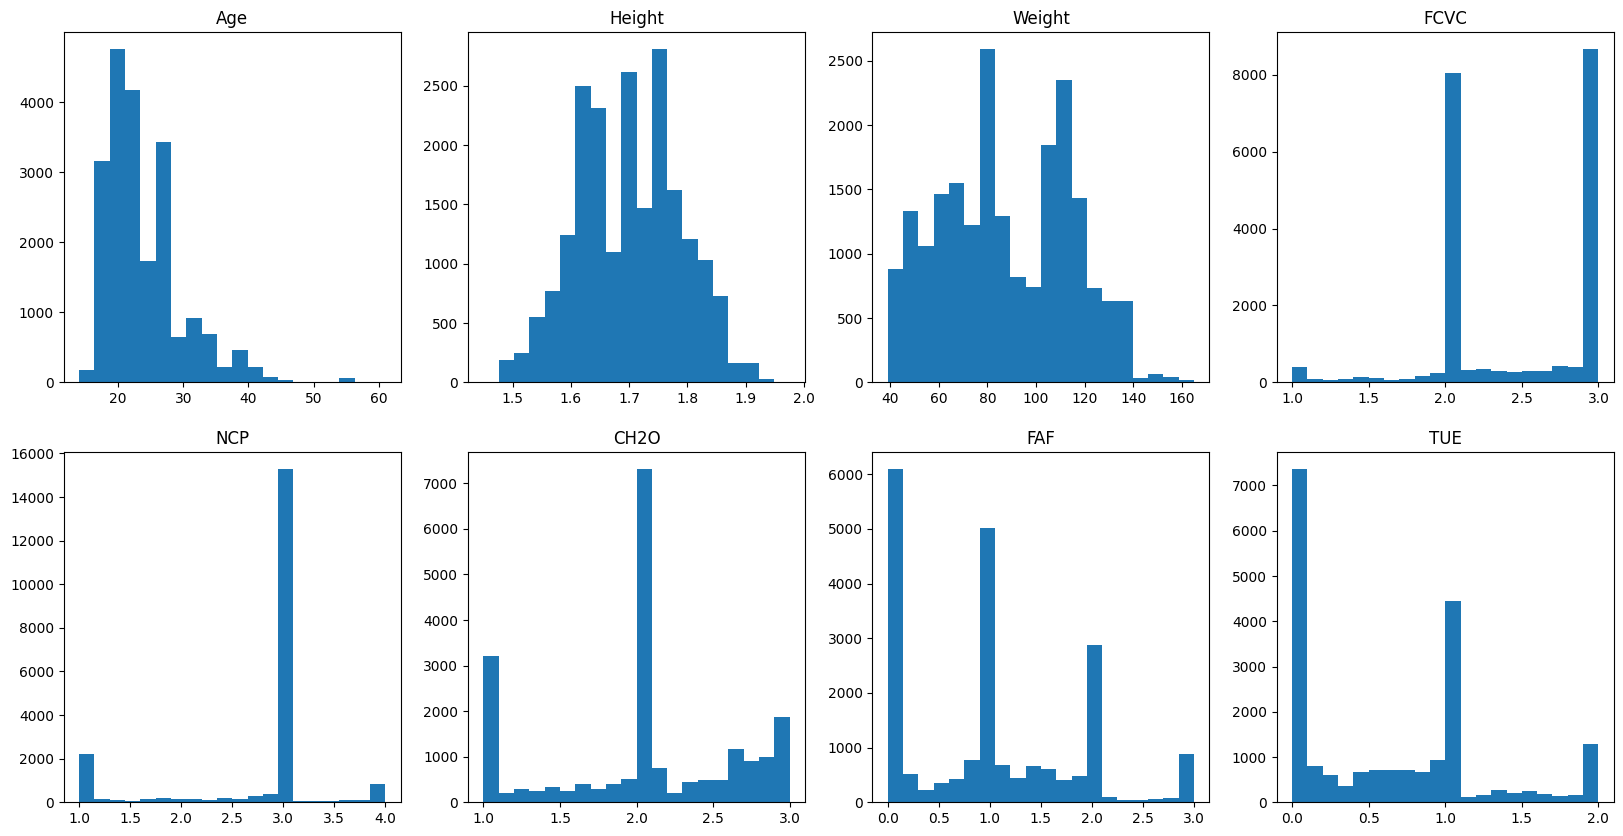

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, feature in enumerate(numerical):
    axes[i // 4, i % 4].hist(df_train[feature], bins=20)
    axes[i // 4, i % 4].set_title(feature)

#### Категориальные признаки + Таргет

Посмотрим на долю каждой категории в каждом признаке:

In [ ]:
for feature in categorical:
    print(df_train[feature].value_counts() / df_train.shape[0])
    print('-----------------------------------')

Gender
Female    0.502071
Male      0.497929
Name: count, dtype: float64
-----------------------------------
family_history_with_overweight
yes    0.819636
no     0.180364
Name: count, dtype: float64
-----------------------------------
FAVC
yes    0.914443
no     0.085557
Name: count, dtype: float64
-----------------------------------
CAEC
Sometimes     0.844446
Frequently    0.119087
Always        0.023027
no            0.013441
Name: count, dtype: float64
-----------------------------------
SMOKE
no     0.988197
yes    0.011803
Name: count, dtype: float64
-----------------------------------
SCC
no     0.966904
yes    0.033096
Name: count, dtype: float64
-----------------------------------
CALC
Sometimes     0.725792
no            0.248723
Frequently    0.025484
Name: count, dtype: float64
-----------------------------------
MTRANS
Public_Transportation    0.803883
Automobile               0.170248
Walking                  0.022497
Motorbike                0.001831
Bike               

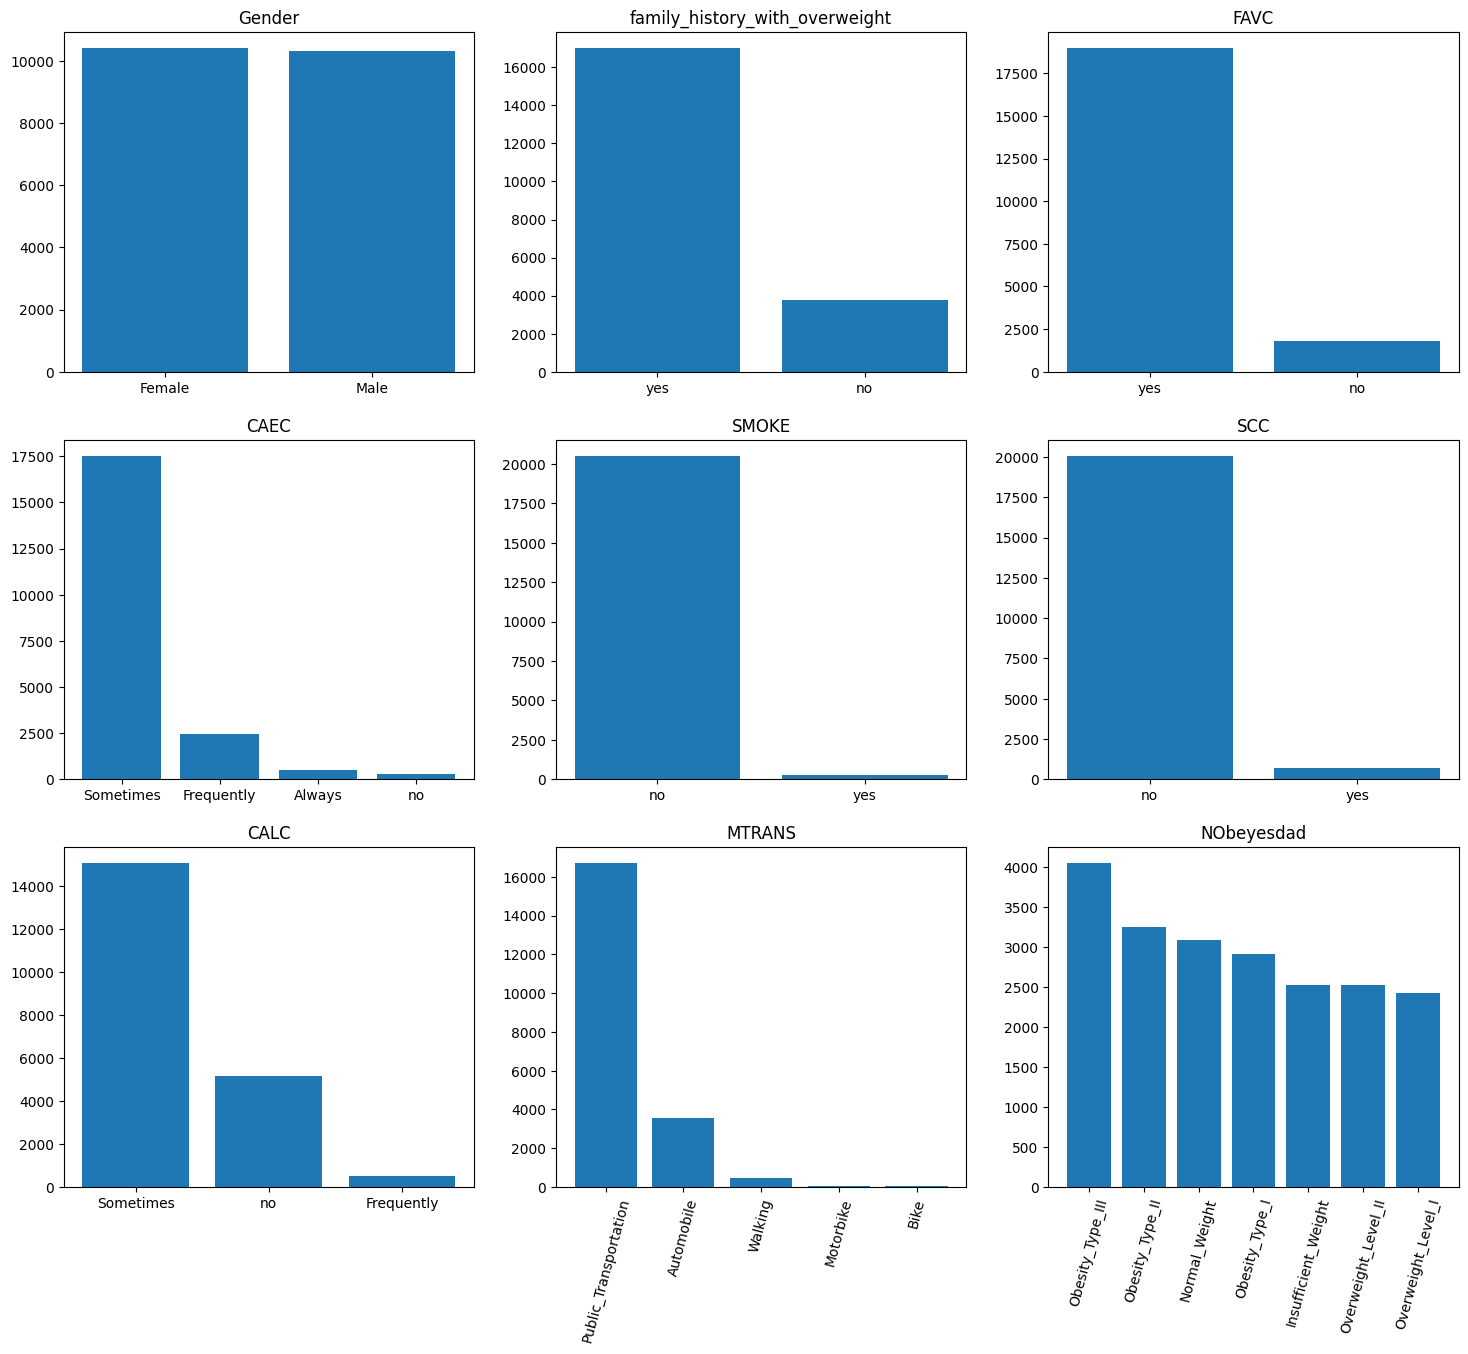

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

for i, feature in enumerate(categorical):
    axes[i // 3, i % 3].bar(df_train[feature].value_counts().index, df_train[feature].value_counts().values)
    axes[i // 3, i % 3].set_title(feature)
    if i in [7, 8]:
        axes[i // 3, i % 3].set_xticklabels(list(df_train[feature].value_counts().index), rotation=75)

В признаке MTRANS катеории Motorbike и Bike являются крайне редкими + совпадают по смыслу. Объединим их в одну категорию

In [ ]:
categorical.remove('NObeyesdad')

## Feature engineering

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
# import numpy as np
# from warnings import warn

class GroupingRareValues():
    """
    Группировка наблюдений, содержащих редкие метки, в уникальную категорию ('rare').

    Parameters
    ----------
    mapping : list, optional
        Список сопоставлений меток столбцов. Каждое сопоставление представлено словарем с ключами 'col' (имя столбца)
        и 'mapping' (словарь сопоставления значений). По умолчанию None.
    cols : list, optional
        Список столбцов, для которых будет выполнена группировка редких меток. По умолчанию None.
    threshold : float, optional
        Порог для определения редких меток. Метки, встречающиеся реже, чем threshold, считаются редкими.
        По умолчанию 0.01.

    Attributes
    ----------
    cols : list
        Список столбцов, для которых будет выполнена группировка редких меток.
    mapping : list
        Список сопоставлений меток столбцов.

    Methods
    -------
    fit(X, y=None, **kwargs)
        Обучение кодировщика на основе данных X и y.
    transform(X)
        Преобразование новых категориальных данных с применением кодировки.
    grouping(X_in, threshold, mapping=None, cols=None)
        Группировка наблюдений, содержащих редкие метки, в уникальную категорию ('rare').

    """

    def __init__(self, mapping=None, cols=None, threshold=0.01):
        self.cols = cols
        self.mapping = mapping
        self._dim = None
        self.threshold = threshold

    def fit(self, X, y=None, **kwargs):
        """
        Обучение кодировщика на основе данных X и y.

        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Матрица признаков, где n_samples - количество образцов,
            а n_features - количество признаков.
        y : array-like, shape = [n_samples]
            Целевые значения.

        Returns
        -------
        self : encoder
            Возвращает self.

        """
        self._dim = X.shape[1]

        _, categories = self.grouping(
            X,
            mapping=self.mapping,
            cols=self.cols,
            threshold=self.threshold
        )
        self.mapping = categories
        return self

    def transform(self, X):
        """
        Выполнение преобразования новых категориальных данных.

        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Матрица новых данных, где n_samples - количество образцов,
            а n_features - количество признаков.

        Returns
        -------
        X : array-like, shape = [n_samples, n_features]
            Преобразованные значения с примененной кодировкой.

        """
        if self._dim is None:
            raise ValueError('Необходимо обучить кодировщик перед его использованием для преобразования данных.')

        # Убедимся, что размерность входных данных соответствует ожидаемой.
        if X.shape[1] != self._dim:
            raise ValueError('Неожиданная размерность входных данных %d, ожидалась %d' % (X.shape[1], self._dim,))

        X, _ = self.grouping(
            X,
            mapping=self.mapping,
            cols=self.cols,
            threshold=self.threshold
        )

        return X

    def grouping(self, X_in, threshold, mapping=None, cols=None):
        """
        Группировка наблюдений, содержащих редкие метки, в уникальную категорию ('rare').

        Parameters
        ----------
        X_in : DataFrame
            Входные данные для группировки.
        threshold : float
            Порог для определения редких меток. Метки, встречающиеся реже, чем threshold, считаются редкими.
        mapping : list, optional
            Список сопоставлений меток столбцов. По умолчанию None.
        cols : list, optional
            Список столбцов, для которых будет выполнена группировка редких меток. По умолчанию None.

        Returns
        -------
        X : DataFrame
            Копия входных данных с примененной группировкой.
        mapping_out : list
            Список сопоставлений меток столбцов после группировки.

        """
        X = X_in.copy(deep=True)

        if mapping is not None:  # Применение существующих сопоставлений
            mapping_out = mapping
            for i in mapping:
                column = i.get('col')  # Получение имени столбца
                X[column] = X[column].map(i['mapping'])
        else:  # Обучение новых сопоставлений
            mapping_out = []
            for col in cols:
                temp_df = pd.Series(X[col].value_counts() / len(X))
                mapping = {k: ('rare' if k not in temp_df[temp_df >= threshold].index else k)
                          for k in temp_df.index}
                mapping = pd.Series(mapping)
                mapping_out.append({'col': col, 'mapping': mapping, 'data_type': X[col].dtype}, )

        return X, mapping_out

    def fit_transform(self, X, y=0):
        self.fit(X)
        return self.transform(X)


class ModeImputation():
    """
    Замена редких меток на наиболее часто встречающуюся метку.

    Parameters
    ----------
    mapping : list, optional
        Список сопоставлений меток столбцов. Каждое сопоставление представлено словарем с ключами 'col' (имя столбца)
        и 'mapping' (словарь сопоставления значений). По умолчанию None.
    cols : list, optional
        Список столбцов, для которых будет выполнена замена редких меток. По умолчанию None.
    threshold : float, optional
        Порог для определения редких меток. Метки, встречающиеся реже, чем threshold, считаются редкими.
        По умолчанию 0.01.

    Attributes
    ----------
    cols : list
        Список столбцов, для которых будет выполнена замена редких меток.
    mapping : list
        Список сопоставлений меток столбцов.

    Methods
    -------
    fit(X, y=None, **kwargs)
        Обучение кодировщика на основе данных X и y.
    transform(X)
        Преобразование новых категориальных данных с применением кодировки.
    impute_with_mode(X_in, threshold, mapping=None, cols=None)
        Замена редких меток на наиболее часто встречающуюся метку.

    """

    def __init__(self, mapping=None, cols=None, threshold=0.01):
        self.cols = cols
        self.mapping = mapping
        self._dim = None
        self.threshold = threshold

    def fit(self, X, y=None, **kwargs):
        """
        Обучение кодировщика на основе данных X и y.

        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Матрица признаков, где n_samples - количество образцов,
            а n_features - количество признаков.
        y : array-like, shape = [n_samples]
            Целевые значения.

        Returns
        -------
        self : encoder
            Возвращает self.

        """
        self._dim = X.shape[1]

        _, categories = self.impute_with_mode(
            X,
            mapping=self.mapping,
            cols=self.cols,
            threshold=self.threshold
        )
        self.mapping = categories
        return self

    def transform(self, X):
        """
        Выполнение преобразования новых категориальных данных.

        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Матрица новых данных, где n_samples - количество образцов,
            а n_features - количество признаков.

        Returns
        -------
        X : array-like, shape = [n_samples, n_features]
            Преобразованные значения с примененной кодировкой.

        """
        if self._dim is None:
            raise ValueError('Необходимо обучить кодировщик перед его использованием для преобразования данных.')

        # Убедимся, что размерность входных данных соответствует ожидаемой.
        if X.shape[1] != self._dim:
            raise ValueError('Неожиданная размерность входных данных %d, ожидалась %d' % (X.shape[1], self._dim,))

        X, _ = self.impute_with_mode(
            X,
            mapping=self.mapping,
            cols=self.cols,
            threshold=self.threshold
        )

        return X

    def impute_with_mode(self, X_in, threshold, mapping=None, cols=None):
        """
        Замена редких меток на наиболее часто встречающуюся метку.

        Parameters
        ----------
        X_in : DataFrame
            Входные данные для замены редких меток.
        threshold : float
            Порог для определения редких меток. Метки, встречающиеся реже, чем threshold, считаются редкими.
        mapping : list, optional
            Список сопоставлений меток столбцов. Каждое сопоставление представлено словарем с ключами 'col' (имя столбца)
            и 'mapping' (словарь сопоставления значений). По умолчанию None.
        cols : list, optional
            Список столбцов, для которых будет выполнена замена редких меток. По умолчанию None.

        Returns
        -------
        X : DataFrame
            Исходные данные с выполненной заменой редких меток.
        mapping_out : list
            Список сопоставлений меток столбцов.

        """
        X = X_in.copy(deep=True)

        if mapping is not None:  # Применение сопоставлений, если они доступны
            mapping_out = mapping
            for i in mapping:
                column = i.get('col')  # Получение имени столбца
                X[column] = X[column].map(i['mapping'])
        else:  # Обучение новых сопоставлений
            mapping_out = []
            for col in cols:
                temp_df = pd.Series(X[col].value_counts() / len(X))
                mode = X[col].mode()[0]
                mapping = {k: (mode if k not in temp_df[temp_df >= threshold].index else k)
                          for k in temp_df.index}
                mapping = pd.Series(mapping)
                mapping_out.append({'col': col, 'mapping': mapping, 'data_type': X[col].dtype}, )

        return X, mapping_out



Протестиируем объединение в единую группу редких категорий в признаке:

In [ ]:
enc = GroupingRareValues(cols=['MTRANS'], threshold=0.01).fit(df_train)

In [ ]:
enc.mapping

[{'col': 'MTRANS',
  'mapping': Public_Transportation    Public_Transportation
  Automobile                          Automobile
  Walking                                Walking
  Motorbike                                 rare
  Bike                                      rare
  dtype: object,
  'data_type': dtype('O')}]

In [ ]:
data2 = enc.transform(df_train)
data2.MTRANS.value_counts()

,count
MTRANS,
Public_Transportation,16687
Automobile,3534
Walking,467
rare,70


Теперь напишем пайпланы для численных и категориальных признаков:

In [ ]:
df_train.drop('id', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df_train.drop('NObeyesdad', axis=1), df_train['NObeyesdad'], test_size=0.3, random_state=42)

In [ ]:
std_scaler = StandardScaler()
ord_encoder = OrdinalEncoder()
enc = GroupingRareValues(cols=['MTRANS'], threshold=0.01)

In [ ]:
pipe_num = Pipeline([('scaler', std_scaler)])

pipe_cat = Pipeline([('encoder', ord_encoder)])

col_transformer = ColumnTransformer([('num_preproc', pipe_num, numerical),
                                     ('cat_preproc', pipe_cat, categorical)])

In [ ]:
X_train_transformed = col_transformer.fit_transform(X_train)
X_test_transformed = col_transformer.transform(X_test)

ord_encoder_target = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

y_train_transformed = ord_encoder_target.fit_transform(y_train.to_frame()).flatten()
y_test_transformed = ord_encoder_target.transform(y_test.to_frame()).flatten()

## Baseline

In [ ]:
! pip install catboost xgboost

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

**Случайный лес:**

In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_transformed, y_train_transformed)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test_transformed)

print('accuracy=', accuracy_score(y_pred, y_test_transformed))

accuracy= 0.8977199743095697


RF с объединением редких категорий MTRANS - 0.8974

RF, но без объединения редких категорий MTRANS - 0.8977

**Градиентный бустинг:**

In [ ]:
clf = XGBClassifier(random_state=42, verbose=False)
clf.fit(X_train_transformed, y_train_transformed)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = clf.predict(X_test_transformed)

print('accuracy=', accuracy_score(y_pred, y_test_transformed))

accuracy= 0.8986833654463712


XGB с объединением редких категорий MTRANS - 0.9019

XGB, но без объединения редких категорий MTRANS - 0.8992

In [ ]:
clf = CatBoostClassifier(verbose=False, random_state=42)
clf.fit(X_train_transformed, y_train_transformed)

iterations=5000, learning_rate=0.01,

In [ ]:
y_pred = clf.predict(X_test_transformed)

print('accuracy=', accuracy_score(y_pred, y_test_transformed))

accuracy= 0.9025369299935774


CatBoost с объединением редких категорий MTRANS - 0.9038

CatBoost, но без объединения редких категорий MTRANS - 0.9035

#### Prediction

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_test.head(2)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.0,Sometimes,no,2.825629,no,0.8554,0.0,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.0,Sometimes,no,3.000000,no,1.0000,0.0,Sometimes,Public_Transportation


In [ ]:
print('Размер тестового набора:', df_test.shape[0])

Размер тестового набора: 13840


In [ ]:
std_scaler = StandardScaler()
ord_encoder = OneHotEncoder(handle_unknown='ignore')
enc = GroupingRareValues(cols=['MTRANS'], threshold=0.01)

pipe_num = Pipeline([('scaler', std_scaler)])
pipe_cat = Pipeline([('rare_vals', enc), ('encoder', ord_encoder)])

col_transformer = ColumnTransformer([('num_preproc', pipe_num, numerical),
                                     ('cat_preproc', pipe_cat, categorical)])

In [ ]:
target = df_train['NObeyesdad']
df_train.drop(columns=['id', 'NObeyesdad'], axis=1, inplace=True)

enc.fit_transform(df_train, df_train)

df_train_transformed = col_transformer.fit_transform(df_train)

In [ ]:
ord_encoder_target = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

target_transformed = ord_encoder_target.fit_transform(target.to_frame()).flatten()

In [ ]:
df_test.drop('id', axis=1, inplace=True)

df_test_transformed = col_transformer.transform(df_test)

In [ ]:
clf = CatBoostClassifier()
clf.fit(df_train_transformed, target_transformed)

Learning rate set to 0.092363
0:	learn: 1.6681090	total: 44.8ms	remaining: 44.8s
1:	learn: 1.4682779	total: 97.8ms	remaining: 48.8s
2:	learn: 1.3254799	total: 146ms	remaining: 48.4s
3:	learn: 1.2092037	total: 190ms	remaining: 47.2s
4:	learn: 1.1168389	total: 231ms	remaining: 46s
5:	learn: 1.0435174	total: 271ms	remaining: 44.9s
6:	learn: 0.9742885	total: 330ms	remaining: 46.8s
7:	learn: 0.9150073	total: 363ms	remaining: 45s
8:	learn: 0.8660228	total: 402ms	remaining: 44.3s
9:	learn: 0.8195437	total: 442ms	remaining: 43.7s
10:	learn: 0.7821981	total: 476ms	remaining: 42.8s
11:	learn: 0.7476250	total: 509ms	remaining: 41.9s
12:	learn: 0.7171751	total: 543ms	remaining: 41.2s
13:	learn: 0.6887910	total: 575ms	remaining: 40.5s
14:	learn: 0.6619009	total: 614ms	remaining: 40.4s
15:	learn: 0.6387866	total: 654ms	remaining: 40.2s
16:	learn: 0.6182964	total: 694ms	remaining: 40.1s
17:	learn: 0.5971727	total: 728ms	remaining: 39.7s
18:	learn: 0.5796543	total: 761ms	remaining: 39.3s
19:	learn: 0.

In [ ]:
preds = clf.predict(df_test_transformed)
preds_out = ord_encoder_target.inverse_transform(preds.reshape(-1, 1))

In [ ]:
preds_df = pd.DataFrame({'id': np.arange(20758, 20758+df_test.shape[0]), 'NObeyesdad': preds_out.flatten()}, index=None)

In [ ]:
preds_df.to_csv('preds.csv', index=False)

## Strong model

In [253]:
from sklearn.ensemble import StackingClassifier, VotingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [254]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [255]:
for df in [df_train, df_test]:
    df['BMI'] = df['Weight'] / (df['Height'] ** 2)
    df['WaterConsuption'] = df['CH2O'].apply(lambda x: 1.0 if x >= 2.0 else 0.0)


In [256]:
numerical, categorical = [], []

df_dtypes = pd.DataFrame({'column': df_train.dtypes.index, 'type': df_train.dtypes.values})

for i in range(df_dtypes.shape[0]):
    if df_dtypes.at[i, 'type'] == 'object':
        categorical.append(df_dtypes.at[i, 'column'])
    else:
        numerical.append(df_dtypes.at[i, 'column'])

numerical.remove('id')
categorical.remove('NObeyesdad')

In [257]:
df_train.drop('id', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df_train.drop('NObeyesdad', axis=1), df_train['NObeyesdad'], test_size=0.2, random_state=42)

In [258]:
std_scaler = StandardScaler()
ord_encoder = OneHotEncoder(handle_unknown='ignore') #OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
ord_encoder_target = OrdinalEncoder(categories=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'], handle_unknown='use_encoded_value', unknown_value=-1)
enc = GroupingRareValues(cols=['MTRANS'], threshold=0.01)

pipe_num = Pipeline([('scaler', std_scaler)])
pipe_cat = Pipeline([('rare_vals', enc), ('encoder', ord_encoder)])

col_transformer = ColumnTransformer([('num_preproc', pipe_num, numerical),
                                     ('cat_preproc', pipe_cat, categorical)])

In [ ]:
df_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,WaterConsuption
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565,1.0
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091,1.0
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706,0.0
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798,0.0
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,36.587084,1.0
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,17.099278,0.0
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,31.889841,1.0
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II,28.899693,1.0


In [259]:
mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

y_train_transformed = y_train.to_frame().replace(mapping)
y_test_transformed = y_test.to_frame().replace(mapping)

In [260]:
from lightgbm import LGBMClassifier

lgbm_params = {
               'objective': 'multiclass',
               'learning_rate': 0.033,
               'verbose': -1,
               'num_class': 7,
               'colsample_bytree': 0.3,
               'n_estimators': 500,
               'lambda_l1': 0.01,
               'lambda_l2': 0.027,
               'max_depth': 10,
               'subsample': 0.95,
               }

catboost_params = {'loss_function': 'MultiClass',
                   'eval_metric': 'Accuracy',
                   'learning_rate': 0.071,
                   'auto_class_weights': 'Balanced',
                   'verbose': False,
                   'random_state': 42,
                   'l2_leaf_reg': 9,
                   'bagging_temperature': 0.55
                   }

xgb_params = {
    'subsample': 0.7,
    'reg_lambda': 0,
    'reg_alpha': 0.4,
    'n_estimators': 200,
    'min_child_weight': 1,
    'max_depth': 5,
    'learning_rate': 0.1,
    'gamma': 0,
    'colsample_bytree': 0.9
}

# rf_pipeline = Pipeline([('preproc', col_transformer),
#                          ('clf', RandomForestClassifier())])

lgbm_pipeline = Pipeline([('preproc', col_transformer),
                         ('clf', LGBMClassifier(**lgbm_params))])

cat_pipeline = Pipeline([('preproc', col_transformer),
                         ('clf', CatBoostClassifier(**catboost_params))])

xgb_pipeline = Pipeline([('preproc', col_transformer),
                         ('clf', XGBClassifier())])

estimators = [('catboost', cat_pipeline), ('lgbm', lgbm_pipeline)]

In [261]:
X_train_transformed = col_transformer.fit_transform(X_train)
X_test_transformed = col_transformer.transform(X_test)

In [ ]:
clf = CatBoostClassifier(**catboost_params)
clf.fit(X_train_transformed, y_train_transformed)
y_pred_c = clf.predict(col_transformer.transform(df_test))

print('accuracy=', accuracy_score(y_pred_c, y_test_transformed))

ValueError: Found input variables with inconsistent numbers of samples: [13840, 4152]

In [ ]:
clf = LGBMClassifier(**lgbm_params)
clf.fit(X_train_transformed, y_train_transformed)
y_pred_l = clf.predict(X_test_transformed)

print('accuracy=', accuracy_score(y_pred_l, y_test_transformed))

accuracy= 0.9087186897880539


In [ ]:
xgb_parameters = {'grow_policy': 'depthwise', 'n_estimators': 982,
               'learning_rate': 0.050053726931263504, 'gamma': 0.5354391952653927,
               'subsample': 0.7060590452456204, 'colsample_bytree': 0.37939433412123275,
               'max_depth': 23, 'min_child_weight': 21, 'reg_lambda': 9.150224029846654e-08,
               'reg_alpha': 5.671063656994295e-08}

clf = XGBClassifier(**xgb_parameters)
clf.fit(X_train_transformed, y_train_transformed)
y_pred_x = clf.predict(X_test_transformed)

print('accuracy=', accuracy_score(y_pred_x, y_test_transformed))

accuracy= 0.9075144508670521


In [ ]:
weights = [0.3, 0.6, 0.1]

reverse_mapping = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Overweight_Level_I',
    3: 'Overweight_Level_II',
    4: 'Obesity_Type_I',
    5: 'Obesity_Type_II',
    6: 'Obesity_Type_III'
}

y_pred_c = stacking_clf.predict(df_test)
preds_out = np.array([reverse_mapping[x] for x in [(weights[0]*y_pred_c[i] + weights[1]*y_pred_l[i] + weights[2]*y_pred_x[i])/3 for i in range()]]).reshape(-1, 1)
preds_df = pd.DataFrame({'id': np.arange(20758, 20758+df_test.shape[0]), 'NObeyesdad': preds_out.flatten()}, index=None)
preds_df.to_csv('preds_17.csv', index=False)

In [262]:
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
voting_clf = VotingClassifier(estimators=estimators, voting='soft')

In [263]:
stacking_clf.fit(X_train, y_train_transformed)

StackingClassifier(estimators=[('catboost',
                                Pipeline(steps=[('preproc',
                                                 ColumnTransformer(transformers=[('num_preproc',
                                                                                  Pipeline(steps=[('scaler',
                                                                                                   StandardScaler())]),
                                                                                  ['Age',
                                                                                   'Height',
                                                                                   'Weight',
                                                                                   'FCVC',
                                                                                   'NCP',
                                                                                   'CH2O',
                                                                                   'FAF',
                                                                                   'TUE',
                                                                                   'BMI',
                                                                                   'WaterConsuption']),
                                                                                 ('cat_preproc',
                                                                                  Pipeline(steps=[('rare_vals',
                                                                                                   <__main__.GroupingRareValues object at 0x793ebd850220>),
                                                                                                  ('encod...
                                                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                                                  ['Gender',
                                                                                   'family_history_with_overweight',
                                                                                   'FAVC',
                                                                                   'CAEC',
                                                                                   'SMOKE',
                                                                                   'SCC',
                                                                                   'CALC',
                                                                                   'MTRANS'])])),
                                                ('clf',
                                                 LGBMClassifier(colsample_bytree=0.3,
                                                                lambda_l1=0.01,
                                                                lambda_l2=0.027,
                                                                learning_rate=0.033,
                                                                max_depth=10,
                                                                n_estimators=500,
                                                                num_class=7,
                                                                objective='multiclass',
                                                                subsample=0.95,
                                                                verbose=-1))]))],
                   final_estimator=LogisticRegression())

In [264]:
y_pred = stacking_clf.predict(X_test)

print('accuracy=', accuracy_score(y_pred, y_test_transformed))

accuracy= 0.9070327552986512


In [265]:
reverse_mapping = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Overweight_Level_I',
    3: 'Overweight_Level_II',
    4: 'Obesity_Type_I',
    5: 'Obesity_Type_II',
    6: 'Obesity_Type_III'
}

y_pred = stacking_clf.predict(df_test)
preds_out = np.array([reverse_mapping[x] for x in y_pred]).reshape(-1, 1)
preds_df = pd.DataFrame({'id': np.arange(20758, 20758+df_test.shape[0]), 'NObeyesdad': preds_out.flatten()}, index=None)
preds_df.to_csv('preds_30.csv', index=False)

In [266]:
y_pred = stacking_clf.predict(X_test)

X_pl = pd.concat([X_train, X_test])
y_pl = pd.concat([pd.DataFrame(y_train_transformed), pd.DataFrame(y_pred, columns=['NObeyesdad'])])

In [267]:
stacking_clf_pl = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf_pl.fit(X_pl, y_pl)

StackingClassifier(estimators=[('catboost',
                                Pipeline(steps=[('preproc',
                                                 ColumnTransformer(transformers=[('num_preproc',
                                                                                  Pipeline(steps=[('scaler',
                                                                                                   StandardScaler())]),
                                                                                  ['Age',
                                                                                   'Height',
                                                                                   'Weight',
                                                                                   'FCVC',
                                                                                   'NCP',
                                                                                   'CH2O',
                                                                                   'FAF',
                                                                                   'TUE',
                                                                                   'BMI',
                                                                                   'WaterConsuption']),
                                                                                 ('cat_preproc',
                                                                                  Pipeline(steps=[('rare_vals',
                                                                                                   <__main__.GroupingRareValues object at 0x793ebd850220>),
                                                                                                  ('encod...
                                                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                                                  ['Gender',
                                                                                   'family_history_with_overweight',
                                                                                   'FAVC',
                                                                                   'CAEC',
                                                                                   'SMOKE',
                                                                                   'SCC',
                                                                                   'CALC',
                                                                                   'MTRANS'])])),
                                                ('clf',
                                                 LGBMClassifier(colsample_bytree=0.3,
                                                                lambda_l1=0.01,
                                                                lambda_l2=0.027,
                                                                learning_rate=0.033,
                                                                max_depth=10,
                                                                n_estimators=500,
                                                                num_class=7,
                                                                objective='multiclass',
                                                                subsample=0.95,
                                                                verbose=-1))]))],
                   final_estimator=LogisticRegression())

In [268]:
reverse_mapping = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Overweight_Level_I',
    3: 'Overweight_Level_II',
    4: 'Obesity_Type_I',
    5: 'Obesity_Type_II',
    6: 'Obesity_Type_III'
}

y_pred = stacking_clf_pl.predict(df_test)
preds_out = np.array([reverse_mapping[x] for x in y_pred]).reshape(-1, 1)
preds_df = pd.DataFrame({'id': np.arange(20758, 20758+df_test.shape[0]), 'NObeyesdad': preds_out.flatten()}, index=None)
preds_df.to_csv('preds_31.csv', index=False) # best

In [269]:
voting_clf.fit(X_train, y_train_transformed)

VotingClassifier(estimators=[('catboost',
                              Pipeline(steps=[('preproc',
                                               ColumnTransformer(transformers=[('num_preproc',
                                                                                Pipeline(steps=[('scaler',
                                                                                                 StandardScaler())]),
                                                                                ['Age',
                                                                                 'Height',
                                                                                 'Weight',
                                                                                 'FCVC',
                                                                                 'NCP',
                                                                                 'CH2O',
                                                                                 'FAF',
                                                                                 'TUE',
                                                                                 'BMI',
                                                                                 'WaterConsuption']),
                                                                               ('cat_preproc',
                                                                                Pipeline(steps=[('rare_vals',
                                                                                                 <__main__.GroupingRareValues object at 0x793ebd850220>),
                                                                                                ('encoder...
                                                                                                ('encoder',
                                                                                                 OneHotEncoder(handle_unknown='ignore'))]),
                                                                                ['Gender',
                                                                                 'family_history_with_overweight',
                                                                                 'FAVC',
                                                                                 'CAEC',
                                                                                 'SMOKE',
                                                                                 'SCC',
                                                                                 'CALC',
                                                                                 'MTRANS'])])),
                                              ('clf',
                                               LGBMClassifier(colsample_bytree=0.3,
                                                              lambda_l1=0.01,
                                                              lambda_l2=0.027,
                                                              learning_rate=0.033,
                                                              max_depth=10,
                                                              n_estimators=500,
                                                              num_class=7,
                                                              objective='multiclass',
                                                              subsample=0.95,
                                                              verbose=-1))]))],
                 voting='soft')

In [270]:
y_pred = voting_clf.predict(X_test)

print('accuracy=', accuracy_score(y_pred, y_test_transformed))

accuracy= 0.9082369942196532


In [271]:
y_pred = voting_clf.predict(df_test)
preds_out = np.array([reverse_mapping[x] for x in y_pred]).reshape(-1, 1)
preds_df = pd.DataFrame({'id': np.arange(20758, 20758+df_test.shape[0]), 'NObeyesdad': preds_out.flatten()}, index=None)
preds_df.to_csv('preds_32.csv', index=False)

In [272]:
voting_clf_pl = VotingClassifier(estimators=estimators, voting='soft')
voting_clf_pl.fit(X_pl, y_pl)

VotingClassifier(estimators=[('catboost',
                              Pipeline(steps=[('preproc',
                                               ColumnTransformer(transformers=[('num_preproc',
                                                                                Pipeline(steps=[('scaler',
                                                                                                 StandardScaler())]),
                                                                                ['Age',
                                                                                 'Height',
                                                                                 'Weight',
                                                                                 'FCVC',
                                                                                 'NCP',
                                                                                 'CH2O',
                                                                                 'FAF',
                                                                                 'TUE',
                                                                                 'BMI',
                                                                                 'WaterConsuption']),
                                                                               ('cat_preproc',
                                                                                Pipeline(steps=[('rare_vals',
                                                                                                 <__main__.GroupingRareValues object at 0x793ebd850220>),
                                                                                                ('encoder...
                                                                                                ('encoder',
                                                                                                 OneHotEncoder(handle_unknown='ignore'))]),
                                                                                ['Gender',
                                                                                 'family_history_with_overweight',
                                                                                 'FAVC',
                                                                                 'CAEC',
                                                                                 'SMOKE',
                                                                                 'SCC',
                                                                                 'CALC',
                                                                                 'MTRANS'])])),
                                              ('clf',
                                               LGBMClassifier(colsample_bytree=0.3,
                                                              lambda_l1=0.01,
                                                              lambda_l2=0.027,
                                                              learning_rate=0.033,
                                                              max_depth=10,
                                                              n_estimators=500,
                                                              num_class=7,
                                                              objective='multiclass',
                                                              subsample=0.95,
                                                              verbose=-1))]))],
                 voting='soft')

In [273]:
y_pred = voting_clf_pl.predict(df_test)
preds_out = np.array([reverse_mapping[x] for x in y_pred]).reshape(-1, 1)
preds_df = pd.DataFrame({'id': np.arange(20758, 20758+df_test.shape[0]), 'NObeyesdad': preds_out.flatten()}, index=None)
preds_df.to_csv('preds_33.csv', index=False)

In [274]:
y_pred = voting_clf.predict(X_test)

X_pl2 = pd.concat([X_train, X_test])
y_pl2 = pd.concat([pd.DataFrame(y_train_transformed), pd.DataFrame(y_pred, columns=['NObeyesdad'])])

In [275]:
voting_clf_pl2 = VotingClassifier(estimators=estimators, voting='soft')
voting_clf_pl2.fit(X_pl2, y_pl2)

VotingClassifier(estimators=[('catboost',
                              Pipeline(steps=[('preproc',
                                               ColumnTransformer(transformers=[('num_preproc',
                                                                                Pipeline(steps=[('scaler',
                                                                                                 StandardScaler())]),
                                                                                ['Age',
                                                                                 'Height',
                                                                                 'Weight',
                                                                                 'FCVC',
                                                                                 'NCP',
                                                                                 'CH2O',
                                                                                 'FAF',
                                                                                 'TUE',
                                                                                 'BMI',
                                                                                 'WaterConsuption']),
                                                                               ('cat_preproc',
                                                                                Pipeline(steps=[('rare_vals',
                                                                                                 <__main__.GroupingRareValues object at 0x793ebd850220>),
                                                                                                ('encoder...
                                                                                                ('encoder',
                                                                                                 OneHotEncoder(handle_unknown='ignore'))]),
                                                                                ['Gender',
                                                                                 'family_history_with_overweight',
                                                                                 'FAVC',
                                                                                 'CAEC',
                                                                                 'SMOKE',
                                                                                 'SCC',
                                                                                 'CALC',
                                                                                 'MTRANS'])])),
                                              ('clf',
                                               LGBMClassifier(colsample_bytree=0.3,
                                                              lambda_l1=0.01,
                                                              lambda_l2=0.027,
                                                              learning_rate=0.033,
                                                              max_depth=10,
                                                              n_estimators=500,
                                                              num_class=7,
                                                              objective='multiclass',
                                                              subsample=0.95,
                                                              verbose=-1))]))],
                 voting='soft')

In [276]:
y_pred = voting_clf_pl2.predict(df_test)
preds_out = np.array([reverse_mapping[x] for x in y_pred]).reshape(-1, 1)
preds_df = pd.DataFrame({'id': np.arange(20758, 20758+df_test.shape[0]), 'NObeyesdad': preds_out.flatten()}, index=None)
preds_df.to_csv('preds_34.csv', index=False)

In [277]:
stacking_clf_pl2 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf_pl2.fit(X_pl2, y_pl2)

StackingClassifier(estimators=[('catboost',
                                Pipeline(steps=[('preproc',
                                                 ColumnTransformer(transformers=[('num_preproc',
                                                                                  Pipeline(steps=[('scaler',
                                                                                                   StandardScaler())]),
                                                                                  ['Age',
                                                                                   'Height',
                                                                                   'Weight',
                                                                                   'FCVC',
                                                                                   'NCP',
                                                                                   'CH2O',
                                                                                   'FAF',
                                                                                   'TUE',
                                                                                   'BMI',
                                                                                   'WaterConsuption']),
                                                                                 ('cat_preproc',
                                                                                  Pipeline(steps=[('rare_vals',
                                                                                                   <__main__.GroupingRareValues object at 0x793ebd850220>),
                                                                                                  ('encod...
                                                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                                                  ['Gender',
                                                                                   'family_history_with_overweight',
                                                                                   'FAVC',
                                                                                   'CAEC',
                                                                                   'SMOKE',
                                                                                   'SCC',
                                                                                   'CALC',
                                                                                   'MTRANS'])])),
                                                ('clf',
                                                 LGBMClassifier(colsample_bytree=0.3,
                                                                lambda_l1=0.01,
                                                                lambda_l2=0.027,
                                                                learning_rate=0.033,
                                                                max_depth=10,
                                                                n_estimators=500,
                                                                num_class=7,
                                                                objective='multiclass',
                                                                subsample=0.95,
                                                                verbose=-1))]))],
                   final_estimator=LogisticRegression())

In [278]:
y_pred = stacking_clf_pl2.predict(df_test)
preds_out = np.array([reverse_mapping[x] for x in y_pred]).reshape(-1, 1)
preds_df = pd.DataFrame({'id': np.arange(20758, 20758+df_test.shape[0]), 'NObeyesdad': preds_out.flatten()}, index=None)
preds_df.to_csv('preds_35.csv', index=False)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import *
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.compose import ColumnTransformer
!pip install catboost
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
poly_columns = ['BMI', 'Height', 'Weight', 'CH2O', 'Age', 'TUE', 'NCP', 'FAF', 'FCVC']
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_X_train = poly.fit_transform(X_train[poly_columns])
poly_X_test = poly.transform(X_test[poly_columns])
poly_test = poly.transform(df_test[poly_columns])
new_columns = poly.get_feature_names_out(poly_columns)
X_train_p = pd.concat([X_train.drop(columns=poly_columns).reset_index(), pd.DataFrame(poly_X_train, columns=new_columns)], axis=1).set_index('index')
X_test_p = pd.concat([X_test.drop(columns=poly_columns).reset_index(), pd.DataFrame(poly_X_test, columns=new_columns)], axis=1).set_index('index')
df_test_p = pd.concat([df_test.drop(columns=poly_columns).reset_index(), pd.DataFrame(poly_test, columns=new_columns)], axis=1).set_index('index')

In [ ]:
stacking_clf_pol = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf_pol.fit(X_train_p, y_train_transformed)

In [ ]:
y_pred = stacking_clf_pol.predict(X_test_p)

print('accuracy=', accuracy_score(y_pred, y_test_transformed))

In [ ]:
y_pred = stacking_clf_pol.predict(df_test_p)
preds_out = np.array([reverse_mapping[x] for x in y_pred]).reshape(-1, 1)
preds_df = pd.DataFrame({'id': np.arange(20758, 20758+df_test.shape[0]), 'NObeyesdad': preds_out.flatten()}, index=None)
preds_df.to_csv('preds_20.csv', index=False)

In [ ]:
y_pred = stacking_clf_pol.predict(X_test)

X_pl_pol = pd.concat([X_train_p, X_test_p])
y_pl_pol = pd.concat([pd.DataFrame(y_train_transformed), pd.DataFrame(y_pred, columns=['NObeyesdad'])])

In [ ]:
stacking_clf_pl_pol = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf_pl_pol.fit(X_pl_pol, y_pl_pol)

In [ ]:
y_pred = stacking_clf_pl_pol.predict(df_test)
preds_out = np.array([reverse_mapping[x] for x in y_pred]).reshape(-1, 1)
preds_df = pd.DataFrame({'id': np.arange(20758, 20758+df_test.shape[0]), 'NObeyesdad': preds_out.flatten()}, index=None)
preds_df.to_csv('preds_21.csv', index=False)